<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/COHORT3_MIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EN ESTE EJERCICIO VOY A INTENTAR HACER TODO EN PYTHON.
# TRABAJO CON EL ARCHIVO U239_IMPORTADO QUE TENGO EN LA CARPETA DE MACHINE LEARNING. ESTA IMPORTADO DEL U239 ORIGINAL QUE TENGO EN MAESTRO

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:


xlsx = pd.ExcelFile("/content/drive/MyDrive/Colab Notebooks/U239_IMPORTADO.xlsx") # ESTE EL NOMBRE DE LA RUTA. 
df = pd.read_excel(xlsx, "U239_IMPORTADO" ) # ESTE EL NOMBRE DE LA PESTAÑA. 
# he descargado el archivo en google drive para no tener que estar cargarlo cada vez que lo utilice. 


In [4]:
pd.options.display.max_columns = 0 # con esto n olimitamos que se vean todas las columnas a lo ancho

In [5]:
df.head()

,Tall,Referencia,Fecha Fa,Fec.aper,Cta.car,Nombre cliente,Cta.tit,Nombre titular,Recamb.,RECAMBIOS PVP,Tiem.fac,Total.MO,Modelo,Recep,Matricula,Bastidor,Tipo O.R.,OR UNICA,MES,AÑO,ESTANCIA,ORDEN CORTA
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,NaN,1,2015,52,765578
1,6,7655784,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,16.38,32.76,0.00,0.00,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,6A O.R. INTER MEC.AUDI,NaN,1,2015,52,765578
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,NaN,1,2015,52,765578
3,1,7683941,2015-01-02,2014-11-24,99234,SALVADOR DEL OLMO GERMA,99234,SALVADOR DEL OLMO GERMA,1675.97,3351.94,1.10,84.70,A-4 2.0 TD,272,8087DGN,WAUZZZ8E85A473547,2A O.R.CLIENT MEC AUDI,NaN,1,2015,39,768394
4,2,7702661,2015-01-02,2014-12-30,71917,RODRIGUEZ RICO MARIA CA,71917,RODRIGUEZ RICO MARIA CA,50.04,116.40,2.10,147.41,POLO 1.4 8,50,8194FBX,WVWZZZ9NZ7Y003242,2V O.R.CLIENT MEC VW,NaN,1,2015,3,770266


In [6]:
df.columns

Index(['Tall', 'Referencia', 'Fecha Fa', 'Fec.aper', 'Cta.car',
       'Nombre cliente', 'Cta.tit', 'Nombre titular', 'Recamb.',
       'RECAMBIOS PVP', 'Tiem.fac', 'Total.MO', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo O.R.', 'OR UNICA', 'MES', 'AÑO', 'ESTANCIA',
       'ORDEN CORTA'],
      dtype='object')

In [7]:
# voy a cambiar el nombre de algunas columnas. 
df = df.rename(columns={"Fecha Fa":"Fecha_Fact", "Fec.aper":"Fecha_Apertura", "Cta.car":"Cta_Cargo","Nombre cliente":"Nombre_Cliente", "Cta.tit":"Cta_Titular", "Nombre titular":"Nombre_Titular", 
                   "Recamb.":"Recamb", "RECAMBIOS PVP":"Recamb_Pvp", "Tiem.fac":"Tiemp_Fact", "Total.MO":"Total_Mo", "Tipo O.R.":"Tipo_Or", "OR UNICA": "Or_Unica", "ORDEN CORTA":"Orden_Corta" })


In [8]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287597 entries, 0 to 287596
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            287597 non-null  int64         
 1   Referencia      287597 non-null  int64         
 2   Fecha_Fact      273899 non-null  datetime64[ns]
 3   Fecha_Apertura  287597 non-null  datetime64[ns]
 4   Cta_Cargo       283357 non-null  object        
 5   Nombre_Cliente  287596 non-null  object        
 6   Cta_Titular     287566 non-null  object        
 7   Nombre_Titular  287565 non-null  object        
 8   Recamb          287597 non-null  float64       
 9   Recamb_Pvp      287597 non-null  float64       
 10  Tiemp_Fact      287592 non-null  float64       
 11  Total_Mo        287592 non-null  float64       
 12  Modelo          286311 non-null  object        
 13  Recep           287597 non-null  object        
 14  Matricula       287597 non-null  obj

In [10]:
# voy a filtrar por fecha
df = df[(df["Fecha_Apertura"]>="2015-01-01") & (df["Fecha_Apertura"]<="2021-12-31")]

In [11]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta'],
      dtype='object')

In [12]:
# lo primero que voy a hacer es cambiar de tipo de datos. 
df["Tall"] = df["Tall"].apply(str)
df["Referencia"] = df["Referencia"].apply(str)
df["Cta_Cargo"] = df["Cta_Cargo"].apply(str)
df["Or_Unica"] = df["Or_Unica"].apply(str)
df["Orden_Corta"] = df["Orden_Corta"].apply(str)

In [13]:
df["Fact_total"] = df["Total_Mo"] + df["Recamb"]

In [14]:
df.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total
7,2,7718451,2015-01-02,2015-01-02,112631,SANCHEZ GALLEGO MARTIN,112631,SANCHEZ GALLEGO MARTIN,81.30,189.70,1.00,54.74,POLO ADVAN,9,1380HNZ,WVWZZZ6RZDY146213,2V O.R.CLIENT MEC VW,nan,1,2015,0,771845,136.04
9,3,7731371,2015-01-02,2015-01-02,129792,MUÑOZ MUÑOZ ANGEL,129792,MUÑOZ MUÑOZ ANGEL,242.54,485.08,0.75,38.00,AUDI A4 AV,63,8066HBC,WAUZZZ8K3BA088978,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,773137,280.54
24,2,7741801,2015-01-02,2015-01-02,97987,MIRA GOMEZ PALOMA,97987,MIRA GOMEZ PALOMA,197.25,429.30,1.60,116.80,TOURAN EDI,9,4533GKB,WVGZZZ1TZ9W031579,2V O.R.CLIENT MEC VW,nan,1,2015,0,774180,314.05
35,3,7747151,2015-01-02,2015-01-02,99476,SANCHEZ FAUQUIER MARIA,99476,SANCHEZ FAUQUIER MARIA,214.89,429.78,2.40,189.51,AUDI A3 SB,63,0511GMX,WAUZZZ8P79A151117,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774715,404.40
37,3,7747441,2015-01-02,2015-01-02,73994,MORENO CANELO REGINA,73994,MORENO CANELO REGINA,231.09,462.18,2.40,189.46,A-3 2.0TDI,63,1076DRZ,WAUZZZ8P36B002015,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774744,420.55


In [15]:
# de esta manera lo que hago es quitar el último digito de la variable referencia. 
# lo he hecho para probar como se hace. podría haberlo metido en otra variable y luego meterla en el dataframe para no eliminar información. 
df["Orden_Corta2"] = df.apply(lambda x: x["Referencia"][:-1], axis=1)

In [16]:
df.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2
7,2,7718451,2015-01-02,2015-01-02,112631,SANCHEZ GALLEGO MARTIN,112631,SANCHEZ GALLEGO MARTIN,81.30,189.70,1.00,54.74,POLO ADVAN,9,1380HNZ,WVWZZZ6RZDY146213,2V O.R.CLIENT MEC VW,nan,1,2015,0,771845,136.04,771845
9,3,7731371,2015-01-02,2015-01-02,129792,MUÑOZ MUÑOZ ANGEL,129792,MUÑOZ MUÑOZ ANGEL,242.54,485.08,0.75,38.00,AUDI A4 AV,63,8066HBC,WAUZZZ8K3BA088978,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,773137,280.54,773137
24,2,7741801,2015-01-02,2015-01-02,97987,MIRA GOMEZ PALOMA,97987,MIRA GOMEZ PALOMA,197.25,429.30,1.60,116.80,TOURAN EDI,9,4533GKB,WVGZZZ1TZ9W031579,2V O.R.CLIENT MEC VW,nan,1,2015,0,774180,314.05,774180
35,3,7747151,2015-01-02,2015-01-02,99476,SANCHEZ FAUQUIER MARIA,99476,SANCHEZ FAUQUIER MARIA,214.89,429.78,2.40,189.51,AUDI A3 SB,63,0511GMX,WAUZZZ8P79A151117,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774715,404.40,774715
37,3,7747441,2015-01-02,2015-01-02,73994,MORENO CANELO REGINA,73994,MORENO CANELO REGINA,231.09,462.18,2.40,189.46,A-3 2.0TDI,63,1076DRZ,WAUZZZ8P36B002015,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774744,420.55,774744


In [17]:
df.shape

(269850, 24)

In [18]:
df.isnull().sum() # como podemos veer debajo tenemos 13.698 filas sin fecha de facturación. estas las voy a quitar. Lo haremos mas adelante. 

Tall                  0
Referencia            0
Fecha_Fact        12648
Fecha_Apertura        0
Cta_Cargo             0
Nombre_Cliente        1
Cta_Titular          26
Nombre_Titular       28
Recamb                0
Recamb_Pvp            0
Tiemp_Fact            2
Total_Mo              2
Modelo             1169
Recep                 0
Matricula             0
Bastidor             33
Tipo_Or               4
Or_Unica              0
MES                   0
AÑO                   0
ESTANCIA              0
Orden_Corta           0
Fact_total            2
Orden_Corta2          0
dtype: int64

In [19]:
df.Orden_Corta2.nunique() # este es número total de ordenes cortas, por lo tanto de pasos. 

176264

In [20]:
df.Bastidor.nunique() # tenemos 58.809 vehículos bastidores diferentes. 

56001

In [21]:
df.Fact_total.describe() # aquí tenemos los estadísticos de facturación total. vemos valores negativos que serán los abonos. 

count    269848.000000
mean        359.609128
std         870.784095
min      -32419.720000
25%          57.257500
50%         197.330000
75%         425.620000
max       32419.720000
Name: Fact_total, dtype: float64

In [22]:
df = df[df["Fact_total"]>=0] # quitamos todas las ordenes que sean negativas. 
df.shape

(265845, 24)

In [23]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2015-01-02 00:00:00 a 2021-12-30 00:00:00


In [24]:
df.Fact_total.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    265845.000000
mean        386.181464
std         782.190732
min           0.000000
25%          63.200000
50%         201.570000
75%         431.540000
90%         815.002000
95%        1255.700000
99%        3148.544000
max       32419.720000
Name: Fact_total, dtype: float64

In [25]:
df.Bastidor.nunique() # por ahora después de la limpieza tenemos 58.798 clientes o bastidores. 

55995

In [26]:
df.Tipo_Or.value_counts(normalize=True) # por numero de lineas, debajo están los pesos. 

2A O.R.CLIENT MEC AUDI       0.201935
2V O.R.CLIENT MEC VW         0.143585
6A O.R. INTER MEC.AUDI       0.111415
7A PRESUPUESTO CH AUDI       0.105901
4A GARANTIA MECAN AUDI       0.092306
6V O.R. INTER MEC.VW         0.077237
7V PRESUPUESTO CH VW         0.070372
4V GARANTIA MECAN VW         0.060114
11LV O.R. MEC VW LONG DRI    0.029149
11LA O.R. MEC AU LONG DRI    0.024311
5A O.R. INTER CH AUDI        0.018481
2A O.R.CLIENT MEC AUDI-CO    0.016337
2V O.R.CLIENT MEC VW-CONT    0.010706
5V O.R. INTER CH VW          0.010431
7LA PRES  AU CH  LONG DRI    0.003878
6L O.R. INTER MEC LCV        0.003574
1A O.R.CLIENT CH AUDI        0.002855
2L O.R.CLIENT MEC LCV        0.002562
DG DEFER.GARANTIA AUDI       0.002400
7LV PRES  VW CH  LONG DRI    0.002028
GD DEFER.GARANTIA MECAN V    0.001599
2RA O.R.CLIENT MEC AUDI -    0.001399
4L GARANTIA MECAN LCV        0.001328
12LA O.R. MEC AU VW RENTI    0.001008
2RV O.R.CLIENT MEC VW-CRE    0.001004
1V O.R.CLIENT CH VW          0.000982
7L PRESUPUES

In [27]:
df.Tipo_Or.nunique() # tenemos 39 tipos de ordenes. 

39

In [28]:
# voy a quitar las internas. 
df[df["Tipo_Or"].str.startswith("5" or "6")==True]

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2
888,6,7762831,2015-01-15,2015-01-07,610431,REACONDICIONAMIENTO V.O,120,BOSQUET PLAZA LUIS ALBE,0.00,0.00,4.30,159.00,Audi A3 Sp,56,5400HYF,WAUZZZ8VXEA197775,5A O.R. INTER CH AUDI,nan,1,2015,8,776283,159.00,776283
1289,1,7769731,2015-01-21,2015-01-12,610623,OTR.GTOS.INTER.VARIAB.V,130733,PALOMARES BOLAÑOS JOSE,0.00,0.00,2.40,115.20,AUDI A3 AT,241,8340JCC,WAUZZZ8V0FA057655,5A O.R. INTER CH AUDI,nan,1,2015,9,776973,115.20,776973
1612,2,7765031,2015-01-26,2015-01-08,610672,GOLPES DADOS POR EL PER,3150,ARVAL SERVICE LEASE SA,0.00,0.00,4.20,201.60,NUEVO POLO,255,3750JBY,WVWZZZ6RZFY213381,5V O.R. INTER CH VW,nan,1,2015,18,776503,201.60,776503
1615,8,7765053,2015-01-26,2015-01-08,610431,REACONDICIONAMIENTO V.O,120,SANCHEZ CRESPO BAEZA AN,0.00,0.00,10.60,398.00,VERSO 1.6,56,1240GSD,NMTDE26R30R001126,5V O.R. INTER CH VW,nan,1,2015,18,776505,398.00,776505
1616,6,7765121,2015-01-26,2015-01-08,610431,REACONDICIONAMIENTO V.O,120,SALABERRIA XAVIER ANDR,0.00,0.00,5.00,180.00,Audi A3 Sp,56,3360HXJ,WAUZZZ8V5EA167194,5A O.R. INTER CH AUDI,nan,1,2015,18,776512,180.00,776512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272204,8,13376631,NaT,2021-11-26,610431,REACONDICIONAMIENTO V.O,120,NO UTILIZAR,0.00,0.00,0.00,0.00,POLO 1.0 T,796,1090KGP,WVWZZZAWZJY007677,5A O.R. INTER CH AUDI,nan,1,1900,-44526,1337663,0.00,1337663
275416,10,13189144,2022-03-14,2021-09-02,610672,GOLPES DADOS POR EL PER,48474,ALPHABET ESPAﾑA FLEET M,0.00,0.00,11.50,634.25,CRAFTER,50,6980KWY,WV1ZZZSYZK9048604,5V O.R. INTER CH VW,nan,3,2022,193,1318914,634.25,1318914
275490,2,13303211,2022-03-31,2021-10-27,610672,GOLPES DADOS POR EL PER,2179,BANCO DE SANTANDER SA,0.00,299.66,8.61,413.28,ARTEON,2230,2620KMS,WVWZZZ3HZJE528683,5V O.R. INTER CH VW,nan,3,2022,155,1330321,413.28,1330321
275555,6,13408561,2022-03-24,2021-12-15,610662,GASTOS ASUMIDOS POR TAL,28639,ALD AUTOMOTIVE SA,12.54,25.08,2.10,100.80,AUDI A4 AV,41,0171KGB,WAUZZZF40JA067637,5A O.R. INTER CH AUDI,nan,3,2022,99,1340856,113.34,1340856


In [29]:
df = df[df["Tipo_Or"].str.startswith("5" or "6")!=True]

In [30]:
df.Bastidor.nunique() # después de haber quitado el interno tenemos 58.714 bastidores. 

55932

In [31]:
df.shape # tenemos 274.898 filas

(258129, 24)

In [32]:
df.isnull().sum()

Tall                  0
Referencia            0
Fecha_Fact        12234
Fecha_Apertura        0
Cta_Cargo             0
Nombre_Cliente        1
Cta_Titular          25
Nombre_Titular       27
Recamb                0
Recamb_Pvp            0
Tiemp_Fact            2
Total_Mo              0
Modelo             1142
Recep                 0
Matricula             0
Bastidor             33
Tipo_Or               2
Or_Unica              0
MES                   0
AÑO                   0
ESTANCIA              0
Orden_Corta           0
Fact_total            0
Orden_Corta2          0
dtype: int64

In [33]:
# vamos a quitar todas las filas que no tengan numero de bastidor.
df = df[~df.Bastidor.isnull()]
df.shape

(258096, 24)

In [34]:
# también vamos a quitar todos los que no tienen fecha de facturación. 
df = df[~df.Fecha_Fact.isnull()]
# Tambien quito los que no tengan nombre del titular. 
df = df[~df.Nombre_Titular.isnull()]
df = df[~df.Cta_Titular.isnull()]
df = df[~df.Modelo.isnull()]

In [35]:
df.Bastidor.nunique() #58058 bastidores. 

55327

In [36]:
df.info() # aqui he quitado todos los nulos. podría haberlos sustituido por otra cosa.....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244860 entries, 7 to 284803
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            244860 non-null  object        
 1   Referencia      244860 non-null  object        
 2   Fecha_Fact      244860 non-null  datetime64[ns]
 3   Fecha_Apertura  244860 non-null  datetime64[ns]
 4   Cta_Cargo       244860 non-null  object        
 5   Nombre_Cliente  244860 non-null  object        
 6   Cta_Titular     244860 non-null  object        
 7   Nombre_Titular  244860 non-null  object        
 8   Recamb          244860 non-null  float64       
 9   Recamb_Pvp      244860 non-null  float64       
 10  Tiemp_Fact      244860 non-null  float64       
 11  Total_Mo        244860 non-null  float64       
 12  Modelo          244860 non-null  object        
 13  Recep           244860 non-null  object        
 14  Matricula       244860 non-null  obj

In [37]:
df.isnull().sum()

Tall              0
Referencia        0
Fecha_Fact        0
Fecha_Apertura    0
Cta_Cargo         0
Nombre_Cliente    0
Cta_Titular       0
Nombre_Titular    0
Recamb            0
Recamb_Pvp        0
Tiemp_Fact        0
Total_Mo          0
Modelo            0
Recep             0
Matricula         0
Bastidor          0
Tipo_Or           0
Or_Unica          0
MES               0
AÑO               0
ESTANCIA          0
Orden_Corta       0
Fact_total        0
Orden_Corta2      0
dtype: int64

In [38]:
# creating some columns for exploratory


df['year'] = df['Fecha_Apertura'].dt.year # sacamos el año de la fecha
df['month'] = df['Fecha_Apertura'].dt.month # sacamos el mes
df['day'] = df['Fecha_Apertura'].dt.day # sacamos el día. 
df['day_of_week'] = df['Fecha_Apertura'].dt.dayofweek # sacamos el día de la semana. 

In [39]:
df.head(2)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week
7,2,7718451,2015-01-02,2015-01-02,112631,SANCHEZ GALLEGO MARTIN,112631,SANCHEZ GALLEGO MARTIN,81.30,189.70,1.00,54.74,POLO ADVAN,9,1380HNZ,WVWZZZ6RZDY146213,2V O.R.CLIENT MEC VW,nan,1,2015,0,771845,136.04,771845,2015,1,2,4
9,3,7731371,2015-01-02,2015-01-02,129792,MUÑOZ MUÑOZ ANGEL,129792,MUÑOZ MUÑOZ ANGEL,242.54,485.08,0.75,38.00,AUDI A4 AV,63,8066HBC,WAUZZZ8K3BA088978,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,773137,280.54,773137,2015,1,2,4


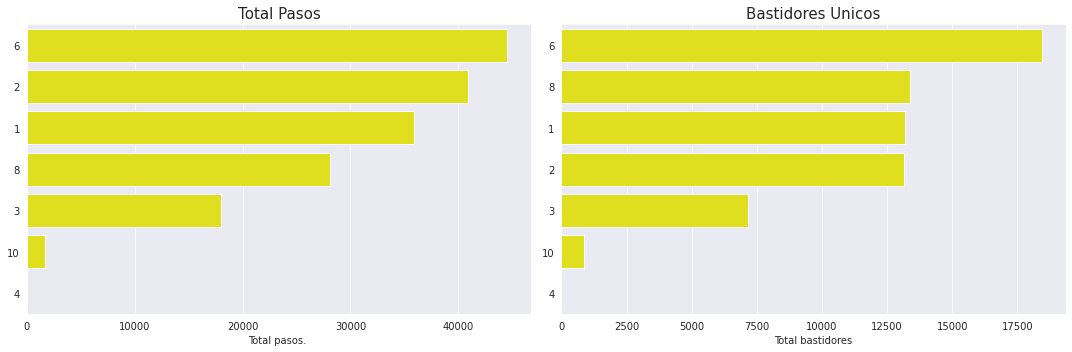

In [40]:
# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Total pasos. ")
        plt.title("Total Pasos", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

In [41]:
df.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # aqui estoy sacando los valores de arriba. 

Tall
6     18428
8     13375
1     13171
2     13139
3      7160
10      878
4         1
Name: Bastidor, dtype: int64

In [42]:
df.groupby("Tall")["Orden_Corta2"].nunique().sort_values(ascending=False) # aqui estoy sacando los valores de arriba. 

Tall
6     44515
2     40878
1     35851
8     28079
3     18045
10     1646
4         1
Name: Orden_Corta2, dtype: int64

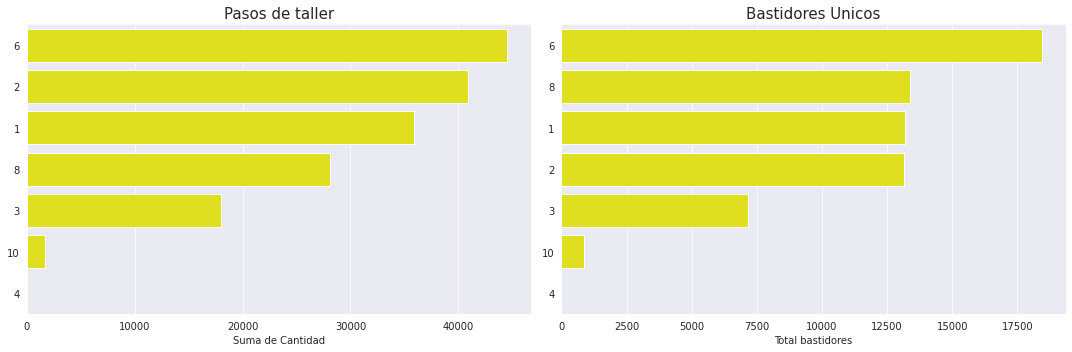

In [43]:
# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Suma de Cantidad")
        plt.title("Pasos de taller", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

In [44]:
df.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall
6     18428
8     13375
1     13171
2     13139
3      7160
10      878
4         1
Name: Bastidor, dtype: int64

In [45]:
df.groupby("Tall")["Fact_total"].sum().sort_values(ascending=False) # aqui estoy agrupando por taller y facturación total. 

Tall
6     30245299.08
1     26191971.30
2     21400644.84
8     12400304.32
3      7884923.84
10      835557.07
4            0.00
Name: Fact_total, dtype: float64

In [46]:
df.groupby( "year")["Bastidor"].nunique().sort_values(ascending=False) # debería quitar todos los datos anteriores al 2015 y quizas el 2022

year
2019    18324
2018    18280
2017    17975
2021    17106
2020    16413
2016    15881
2015    14399
Name: Bastidor, dtype: int64

In [47]:
# si quiero agrupar por mas de una variable se hace así. 
df.groupby(["Tall", "year"])["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall  year
6     2019    5031
2     2015    4957
6     2018    4821
      2021    4812
      2020    4792
      2017    4517
2     2017    4473
      2016    4303
1     2017    4220
2     2018    4206
1     2018    4172
6     2016    4165
2     2019    4022
1     2019    3957
2     2021    3834
6     2015    3777
8     2018    3735
1     2016    3647
8     2021    3593
1     2021    3562
8     2019    3542
2     2020    3486
8     2017    3451
1     2020    3390
      2015    3332
8     2020    3177
      2016    2621
3     2017    2237
      2019    2212
      2018    2154
      2015    2024
      2016    1977
      2020    1888
      2021    1717
8     2015    1172
10    2019     394
      2021     392
      2020     367
      2018      84
4     2020       1
Name: Bastidor, dtype: int64

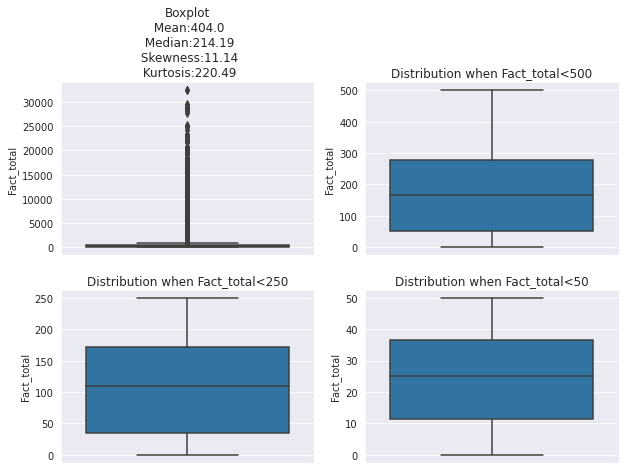

In [48]:
# Looking the distribution of column Quantity
plt.figure(figsize=(10,7)) # fijamos el tamaño del gráfico

skewness = round(df.Fact_total.skew(),2) # calculamos el skewness
kurtosis = round(df.Fact_total.kurtosis(),2) # calculamos la kurtosis
mean = round(np.mean(df.Fact_total),0) # calculamos la media
median = np.median(df.Fact_total) # calculamos la mediana. 

plt.subplot(2,2,1) # esto quieres decir un grafico de 2 x 2 y este ira en 0.0 primera fila primera columna. 
sns.boxplot(y=df.Fact_total)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))
# le estamos metindo una descripción

plt.subplot(2,2,2)
sns.boxplot(y=df[df.Fact_total<500]['Fact_total'])
plt.title('Distribution when Fact_total<500')

plt.subplot(2,2,3)
sns.boxplot(y=df[df.Fact_total<250]['Fact_total'])
plt.title('Distribution when Fact_total<250')

plt.subplot(2,2,4)
sns.boxplot(y=df[df.Fact_total<50]['Fact_total'])
plt.title('Distribution when Fact_total<50')

plt.show()

# estamos trabajando con la cantidad y la analizamos desde diferentes rangos la facturación total. 

In [49]:
# vamos a quitar todos los totales superiores a 5.000
df = df[df["Fact_total"]<1100]


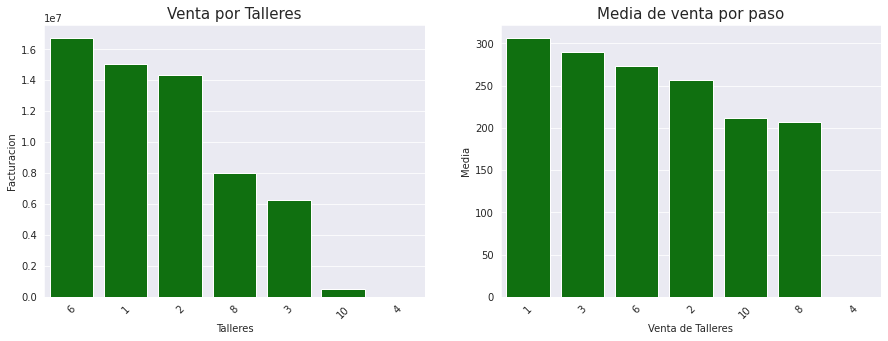

In [50]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).values, # agrupamos por taller y facturación total
            x = df.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).index, 
            color='green')

plt.ylabel('Facturacion')
plt.xlabel('Talleres')
plt.xticks(rotation=45)
plt.title('Venta por Talleres',size=15)

plt.subplot(1,2,2)
sns.barplot(y = df.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).values, # agrupamos por taller y media de facturación por paso
            x = df.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).index, 
            color='green')
# en este lo que hacemos es hayar valores unicos de numero de factura. 
plt.ylabel('Media')
plt.xlabel('Venta de Talleres')
plt.xticks(rotation=45)
plt.title('Media de venta por paso',size=15)

plt.show()

In [51]:
df.Fact_total.mean() # esta es la media de todos los valores. 

265.9382879453946

In [52]:
print(df[df["Tall"]=="1"]["Fact_total"].mean())
print(df[df["Tall"]=="6"]["Fact_total"].mean())
print(df[df["Tall"]=="3"]["Fact_total"].mean())
print(df[df["Tall"]=="2"]["Fact_total"].mean())
print(df[df["Tall"]=="10"]["Fact_total"].mean())
print(df[df["Tall"]=="8"]["Fact_total"].mean())

306.51480710049526
272.74369321514695
290.4153450041903
256.6286621481455
211.47864619377162
206.81813123481675


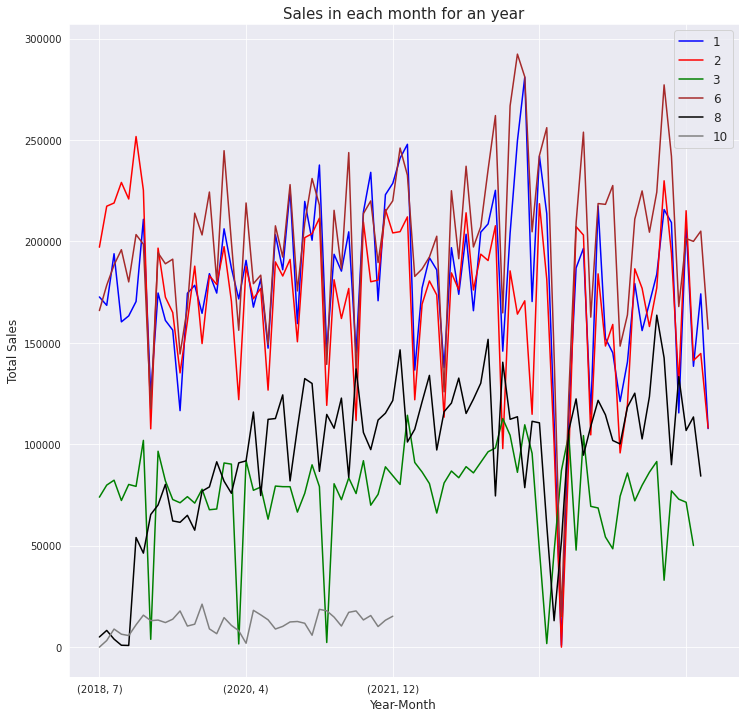

In [53]:
plt.figure(figsize=(12,12))
df[df['Tall']=='1'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

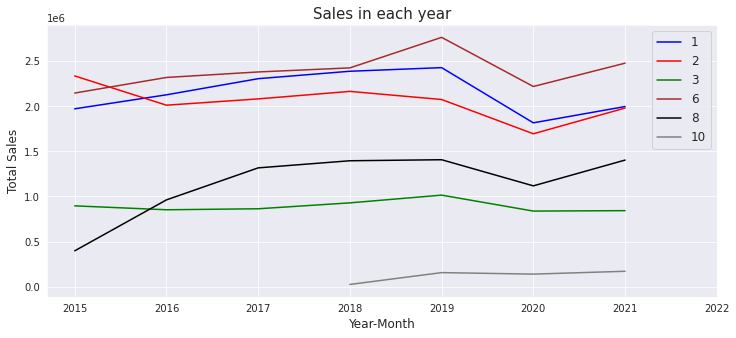

In [54]:
plt.figure(figsize=(12,5))
df[df['Tall']=='1'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each year', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

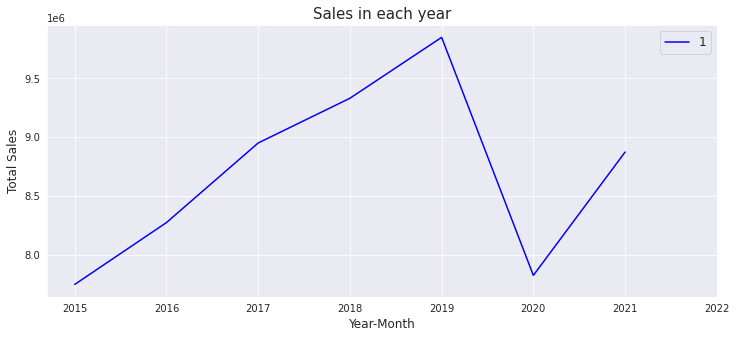

In [55]:
plt.figure(figsize=(12,5))
df.groupby(['year'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each year', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

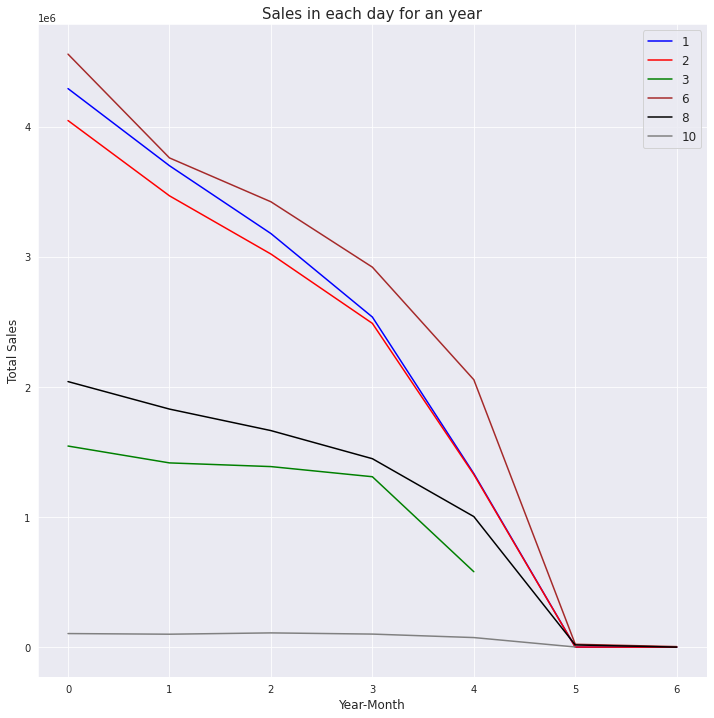

In [56]:
# ahora hacemos lo mismo pero lo vamos a ver por día de la semana. 

plt.figure(figsize=(12,12))
df[df['Tall']=='1'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each day for an year', size=15)
plt.legend(fontsize=12)
plt.show()

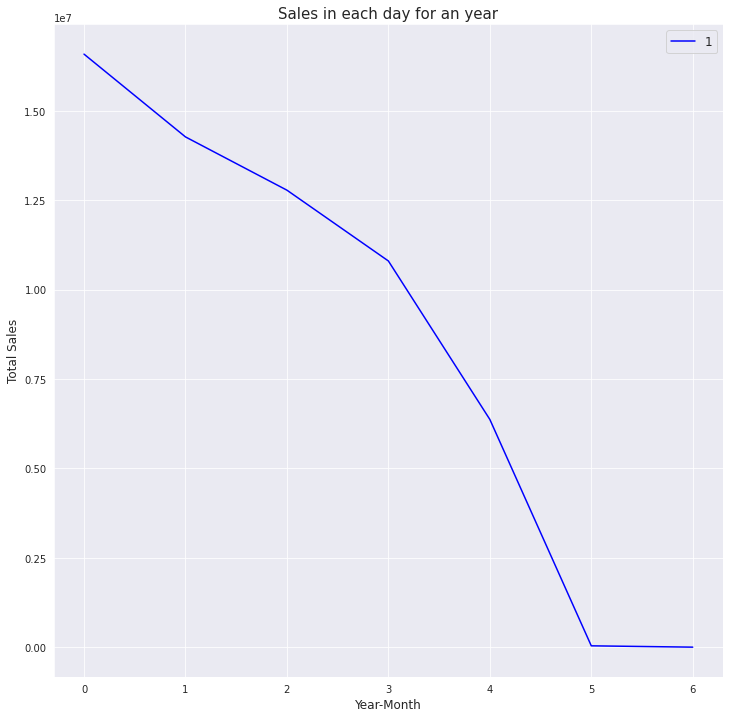

In [57]:
# ahora hacemos lo mismo pero lo vamos a ver por día de la semana. 

plt.figure(figsize=(12,12))
df.groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each day for an year', size=15)
plt.legend(fontsize=12)
plt.show()

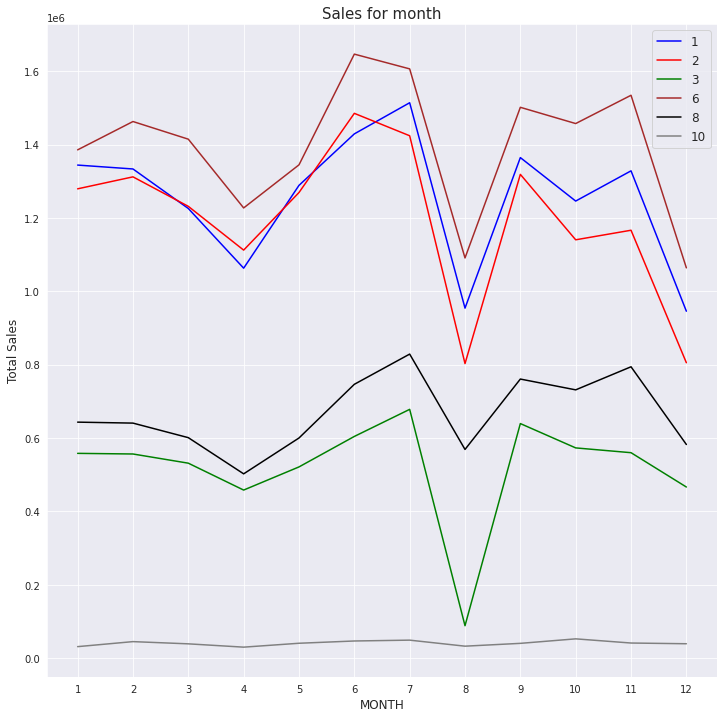

In [58]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df[df['Tall']=='1'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)
plt.show()

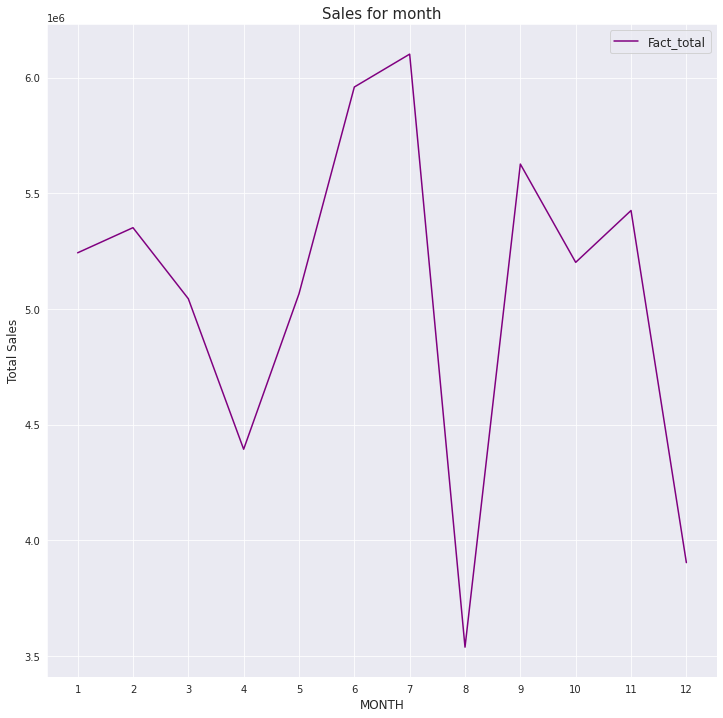

In [59]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df.groupby(['month'])['Fact_total'].sum().plot(kind='line',color='purple')


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)

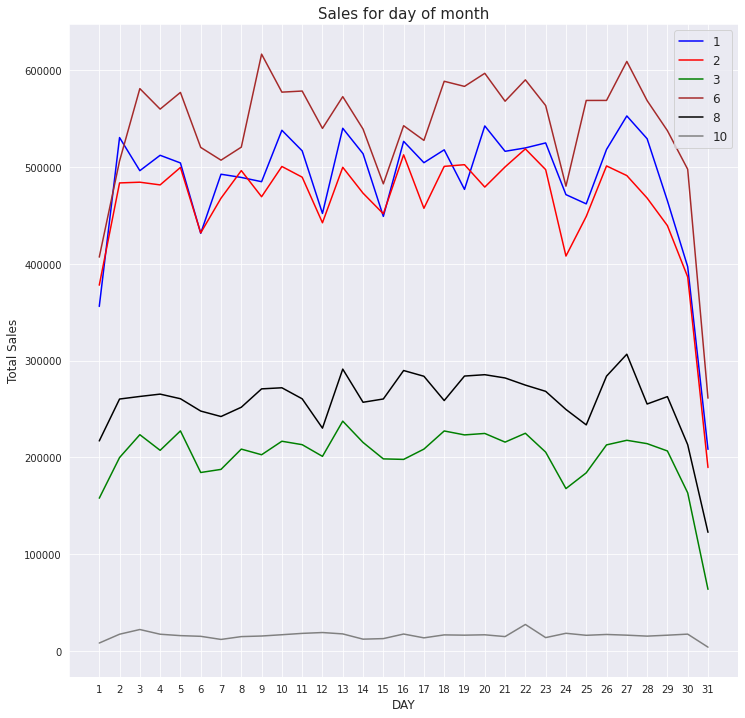

In [60]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df[df['Tall']=='1'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('DAY',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for day of month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.legend(fontsize=12)
plt.show()

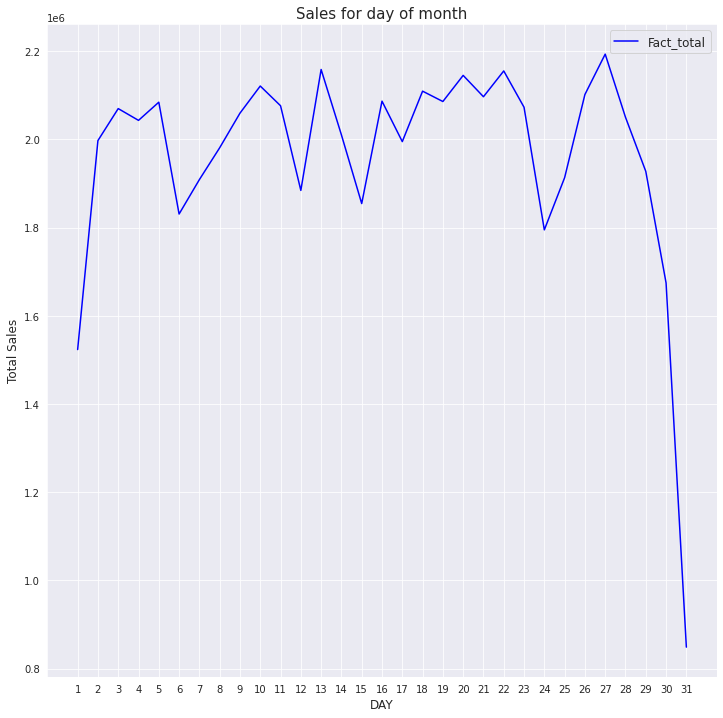

In [61]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df.groupby(['day'])['Fact_total'].sum().plot(kind='line',color='blue')

# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('DAY',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for day of month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.legend(fontsize=12)
plt.show()

In [62]:
df_cohort = df.copy()

- vamos a crear tres columnas nuevas. 
    - Invoice Month. representa el string el mes y año de una factura concreta. 
    - Cohort Month. representa el string el año y el mes de la primera compra de cada cliente. 
    - Cohort Period. representa el string del ciclo de vida del cliente. el numero de meses representa el numero de meses desde la primera compra. 

In [63]:
# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort['InvoiceMonth'] = df_cohort['Fecha_Apertura'].dt.strftime('%Y-%m') # lo convierte en formato strftime. Estamos poniendo todas las fecha a día 1
# luego en formato fecha. 
# converting the variable to datetime format
df_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceMonth'])

In [64]:
df_cohort.InvoiceMonth

7        2015-01-01
9        2015-01-01
24       2015-01-01
35       2015-01-01
37       2015-01-01
            ...    
284790   2021-10-01
284795   2021-11-01
284796   2021-11-01
284797   2021-11-01
284803   2021-12-01
Name: InvoiceMonth, Length: 228842, dtype: datetime64[ns]

In [65]:
# creating the second variable 'Cohort Month'
# getting the first time purchase date for each customer

df_cohort['CohortMonth'] = df_cohort.groupby('Bastidor')['InvoiceMonth'].transform('min') # aqui saca la primera compra. 
# converting the variable to datetime format
df_cohort['CohortMonth'] = pd.to_datetime(df_cohort['CohortMonth'])

In [66]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228842 entries, 7 to 284803
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            228842 non-null  object        
 1   Referencia      228842 non-null  object        
 2   Fecha_Fact      228842 non-null  datetime64[ns]
 3   Fecha_Apertura  228842 non-null  datetime64[ns]
 4   Cta_Cargo       228842 non-null  object        
 5   Nombre_Cliente  228842 non-null  object        
 6   Cta_Titular     228842 non-null  object        
 7   Nombre_Titular  228842 non-null  object        
 8   Recamb          228842 non-null  float64       
 9   Recamb_Pvp      228842 non-null  float64       
 10  Tiemp_Fact      228842 non-null  float64       
 11  Total_Mo        228842 non-null  float64       
 12  Modelo          228842 non-null  object        
 13  Recep           228842 non-null  object        
 14  Matricula       228842 non-null  obj

In [67]:
# aqui creamos la tercera variable. el periodo cohort. 
# calculamos el numero de meses desde la primera compra a la fecha de la factura. 
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)
    # multiplica * 12 para convertir la diferencia en años en meses. luego le suma los meses del ultimo año. 

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'], df_cohort['CohortMonth'])

In [68]:
df_cohort.sample(5)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week,InvoiceMonth,CohortMonth,CohortPeriod
145546,1,10908732,2018-11-06,2018-10-17,98253,MUTUA MADRILEÑA AUTOMOV,133718,CUESTA AVILA MIGUEL,140.91,281.82,7.44,281.93,A4,95,7268HLC,WAUZZZ8K0DA030958,7A PRESUPUESTO CH AUDI,nan,11,2018,20,1090873,422.84,1090873,2018,10,17,2,2018-10-01,2015-06-01,40
261999,8,13275672,2021-10-29,2021-10-15,610662,GASTOS ASUMIDOS POR TAL,194773,JIMENEZ ZARZO PATRICIA,15.94,34.26,2.10,100.80,VW Sharan,50,4762LHH,WVWZZZ7NZLV011894,6V O.R. INTER MEC.VW,nan,10,2021,14,1327567,116.74,1327567,2021,10,15,4,2021-10-01,2021-08-01,2
71538,6,9383741,2017-02-23,2017-02-15,610621,GASTOS PREENTREGA VN AU,142826,ALARCOS MANZANEQUE PEDR,42.38,84.76,2.75,132.00,AUDI A3 SP,888,7441JWX,WAUZZZ8V1HA100287,6A O.R. INTER MEC.AUDI,nan,2,2017,8,938374,174.38,938374,2017,2,15,2,2017-02-01,2017-02-01,0
161859,8,11269451,2019-03-15,2019-03-15,145182,JUAN JOSE DE LA CALLE C,145182,JUAN JOSE DE LA CALLE C,107.49,261.27,0.90,72.26,NUEVO TIGU,9,6218KDM,WVGZZZ5NZJW843835,2V O.R.CLIENT MEC VW,nan,3,2019,0,1126945,179.75,1126945,2019,3,15,4,2019-03-01,2017-10-01,17
115231,1,10252262,2018-03-09,2018-02-27,116,ORDENES DE REPARACION G,3150,ARVAL SERVICE LEASE SA,42.12,92.26,1.52,107.67,AUDI Q5 S,294,7841JGG,WAUZZZ8R6FA120888,4A GARANTIA MECAN AUDI,nan,3,2018,10,1025226,149.79,1025226,2018,2,27,1,2018-02-01,2017-03-01,11


In [69]:
customer_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Bastidor', aggfunc='nunique')
customer_cohort
# aqui lo que hacemos es una pivot table. donde el index son las fechas de Cohort month
# las columnas son el cohort period, los valores son el count de customer id, y con aggfunc le pedimos que sean únicos. 

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1474.0,95.0,105.0,83.0,104.0,103.0,113.0,49.0,119.0,109.0,84.0,99.0,123.0,125.0,98.0,89.0,97.0,121.0,122.0,78.0,114.0,84.0,111.0,75.0,157.0,116.0,98.0,70.0,102.0,78.0,92.0,41.0,68.0,70.0,61.0,56.0,92.0,62.0,76.0,84.0,...,53.0,63.0,56.0,38.0,77.0,72.0,58.0,41.0,55.0,39.0,51.0,14.0,60.0,46.0,36.0,36.0,46.0,44.0,46.0,3.0,13.0,41.0,42.0,30.0,24.0,49.0,26.0,47.0,30.0,41.0,37.0,25.0,37.0,28.0,32.0,16.0,22.0,16.0,29.0,42.0
2015-02-01,1522.0,77.0,80.0,90.0,92.0,128.0,54.0,116.0,106.0,83.0,89.0,87.0,120.0,92.0,98.0,86.0,125.0,105.0,70.0,95.0,97.0,106.0,87.0,95.0,154.0,110.0,60.0,83.0,86.0,82.0,46.0,76.0,76.0,80.0,56.0,72.0,97.0,72.0,99.0,77.0,...,62.0,59.0,40.0,69.0,71.0,61.0,49.0,43.0,37.0,66.0,30.0,55.0,60.0,52.0,36.0,47.0,55.0,44.0,NaN,21.0,35.0,46.0,19.0,36.0,57.0,22.0,36.0,37.0,50.0,56.0,26.0,35.0,43.0,37.0,23.0,34.0,23.0,24.0,43.0,NaN
2015-03-01,1449.0,78.0,81.0,87.0,123.0,58.0,100.0,90.0,93.0,71.0,76.0,125.0,107.0,124.0,92.0,101.0,106.0,68.0,99.0,74.0,95.0,68.0,88.0,98.0,169.0,109.0,92.0,101.0,82.0,49.0,66.0,75.0,64.0,40.0,67.0,68.0,70.0,79.0,62.0,56.0,...,49.0,40.0,53.0,42.0,89.0,68.0,45.0,48.0,59.0,21.0,43.0,53.0,41.0,31.0,35.0,48.0,32.0,3.0,22.0,37.0,40.0,27.0,36.0,46.0,30.0,42.0,25.0,47.0,50.0,35.0,30.0,50.0,42.0,21.0,22.0,29.0,31.0,14.0,NaN,NaN
2015-04-01,1288.0,68.0,79.0,80.0,44.0,75.0,69.0,64.0,61.0,73.0,73.0,72.0,95.0,75.0,100.0,82.0,78.0,102.0,65.0,86.0,59.0,90.0,68.0,89.0,116.0,105.0,83.0,73.0,38.0,61.0,64.0,60.0,38.0,62.0,54.0,45.0,85.0,65.0,53.0,68.0,...,40.0,40.0,35.0,57.0,73.0,47.0,52.0,38.0,30.0,51.0,50.0,43.0,30.0,33.0,24.0,24.0,1.0,12.0,41.0,36.0,14.0,33.0,38.0,26.0,39.0,18.0,28.0,44.0,52.0,28.0,44.0,26.0,15.0,27.0,20.0,19.0,21.0,NaN,NaN,NaN
2015-05-01,1176.0,67.0,86.0,35.0,65.0,61.0,63.0,54.0,63.0,66.0,73.0,74.0,89.0,84.0,56.0,46.0,65.0,71.0,76.0,55.0,69.0,58.0,68.0,75.0,138.0,106.0,58.0,31.0,45.0,59.0,52.0,40.0,54.0,57.0,61.0,71.0,78.0,50.0,59.0,28.0,...,46.0,33.0,38.0,41.0,90.0,53.0,54.0,19.0,30.0,40.0,37.0,27.0,38.0,28.0,22.0,NaN,24.0,35.0,24.0,19.0,23.0,34.0,22.0,33.0,11.0,27.0,27.0,30.0,41.0,44.0,31.0,12.0,22.0,16.0,21.0,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,357.0,20.0,17.0,18.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-01,434.0,22.0,22.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-01,453.0,28.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- la tabla de arriba representa la retención y la adquisición de nuevos clientes. 
    - Verticalmente la columna 0 representa cuantos clientes hicieron su primera compra por mes o por fecha. 
        - por ejemplo 444 en febrero del 2022 son los nuevos clientes diferentes de la primera fecha que abril del 2004. al siguiente mes fueron 585 nuevos diferentes a abril del 2004 y así sucesivamente. 
    - horizontalmente. la primera columna nos dice cuantos clientes siguen siendo clientes. 
        - ejemplo. de los clientes de febrero del 2022 despues de un mes vinieron 34, al segundo mes repitieron 25 y asi sucesivamente.  

In [70]:
# Retention table
# lo mismo que lo anterior pero expresado en porcentajes. 

cohort_size = customer_cohort.iloc[:,0] # todas las filas y la primera columna. customer_cohort es la pivot table. 
# cogemos la primera fila 0, porque será el dividendo de todos los calculos
retention = customer_cohort.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
# dividimos todos los valores entre la primera columna que es cohort_size
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 #to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
2015-01-01,100.0,6.4,7.1,5.6,7.1,7.0,7.7,3.3,8.1,7.4,5.7,6.7,8.3,8.5,6.6,6.0,6.6,8.2,8.3,5.3,7.7,5.7,7.5,5.1,10.7,7.9,6.6,4.7,6.9,5.3,6.2,2.8,4.6,4.7,4.1,3.8,6.2,4.2,5.2,5.7,...,3.6,4.3,3.8,2.6,5.2,4.9,3.9,2.8,3.7,2.6,3.5,0.9,4.1,3.1,2.4,2.4,3.1,3.0,3.1,0.2,0.9,2.8,2.8,2.0,1.6,3.3,1.8,3.2,2.0,2.8,2.5,1.7,2.5,1.9,2.2,1.1,1.5,1.1,2.0,2.8
2015-02-01,100.0,5.1,5.3,5.9,6.0,8.4,3.5,7.6,7.0,5.5,5.8,5.7,7.9,6.0,6.4,5.7,8.2,6.9,4.6,6.2,6.4,7.0,5.7,6.2,10.1,7.2,3.9,5.5,5.7,5.4,3.0,5.0,5.0,5.3,3.7,4.7,6.4,4.7,6.5,5.1,...,4.1,3.9,2.6,4.5,4.7,4.0,3.2,2.8,2.4,4.3,2.0,3.6,3.9,3.4,2.4,3.1,3.6,2.9,NaN,1.4,2.3,3.0,1.2,2.4,3.7,1.4,2.4,2.4,3.3,3.7,1.7,2.3,2.8,2.4,1.5,2.2,1.5,1.6,2.8,NaN
2015-03-01,100.0,5.4,5.6,6.0,8.5,4.0,6.9,6.2,6.4,4.9,5.2,8.6,7.4,8.6,6.3,7.0,7.3,4.7,6.8,5.1,6.6,4.7,6.1,6.8,11.7,7.5,6.3,7.0,5.7,3.4,4.6,5.2,4.4,2.8,4.6,4.7,4.8,5.5,4.3,3.9,...,3.4,2.8,3.7,2.9,6.1,4.7,3.1,3.3,4.1,1.4,3.0,3.7,2.8,2.1,2.4,3.3,2.2,0.2,1.5,2.6,2.8,1.9,2.5,3.2,2.1,2.9,1.7,3.2,3.5,2.4,2.1,3.5,2.9,1.4,1.5,2.0,2.1,1.0,NaN,NaN
2015-04-01,100.0,5.3,6.1,6.2,3.4,5.8,5.4,5.0,4.7,5.7,5.7,5.6,7.4,5.8,7.8,6.4,6.1,7.9,5.0,6.7,4.6,7.0,5.3,6.9,9.0,8.2,6.4,5.7,3.0,4.7,5.0,4.7,3.0,4.8,4.2,3.5,6.6,5.0,4.1,5.3,...,3.1,3.1,2.7,4.4,5.7,3.6,4.0,3.0,2.3,4.0,3.9,3.3,2.3,2.6,1.9,1.9,0.1,0.9,3.2,2.8,1.1,2.6,3.0,2.0,3.0,1.4,2.2,3.4,4.0,2.2,3.4,2.0,1.2,2.1,1.6,1.5,1.6,NaN,NaN,NaN
2015-05-01,100.0,5.7,7.3,3.0,5.5,5.2,5.4,4.6,5.4,5.6,6.2,6.3,7.6,7.1,4.8,3.9,5.5,6.0,6.5,4.7,5.9,4.9,5.8,6.4,11.7,9.0,4.9,2.6,3.8,5.0,4.4,3.4,4.6,4.8,5.2,6.0,6.6,4.3,5.0,2.4,...,3.9,2.8,3.2,3.5,7.7,4.5,4.6,1.6,2.6,3.4,3.1,2.3,3.2,2.4,1.9,NaN,2.0,3.0,2.0,1.6,2.0,2.9,1.9,2.8,0.9,2.3,2.3,2.6,3.5,3.7,2.6,1.0,1.9,1.4,1.8,0.9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,100.0,5.6,4.8,5.0,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-01,100.0,5.1,5.1,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-01,100.0,6.2,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-01,100.0,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


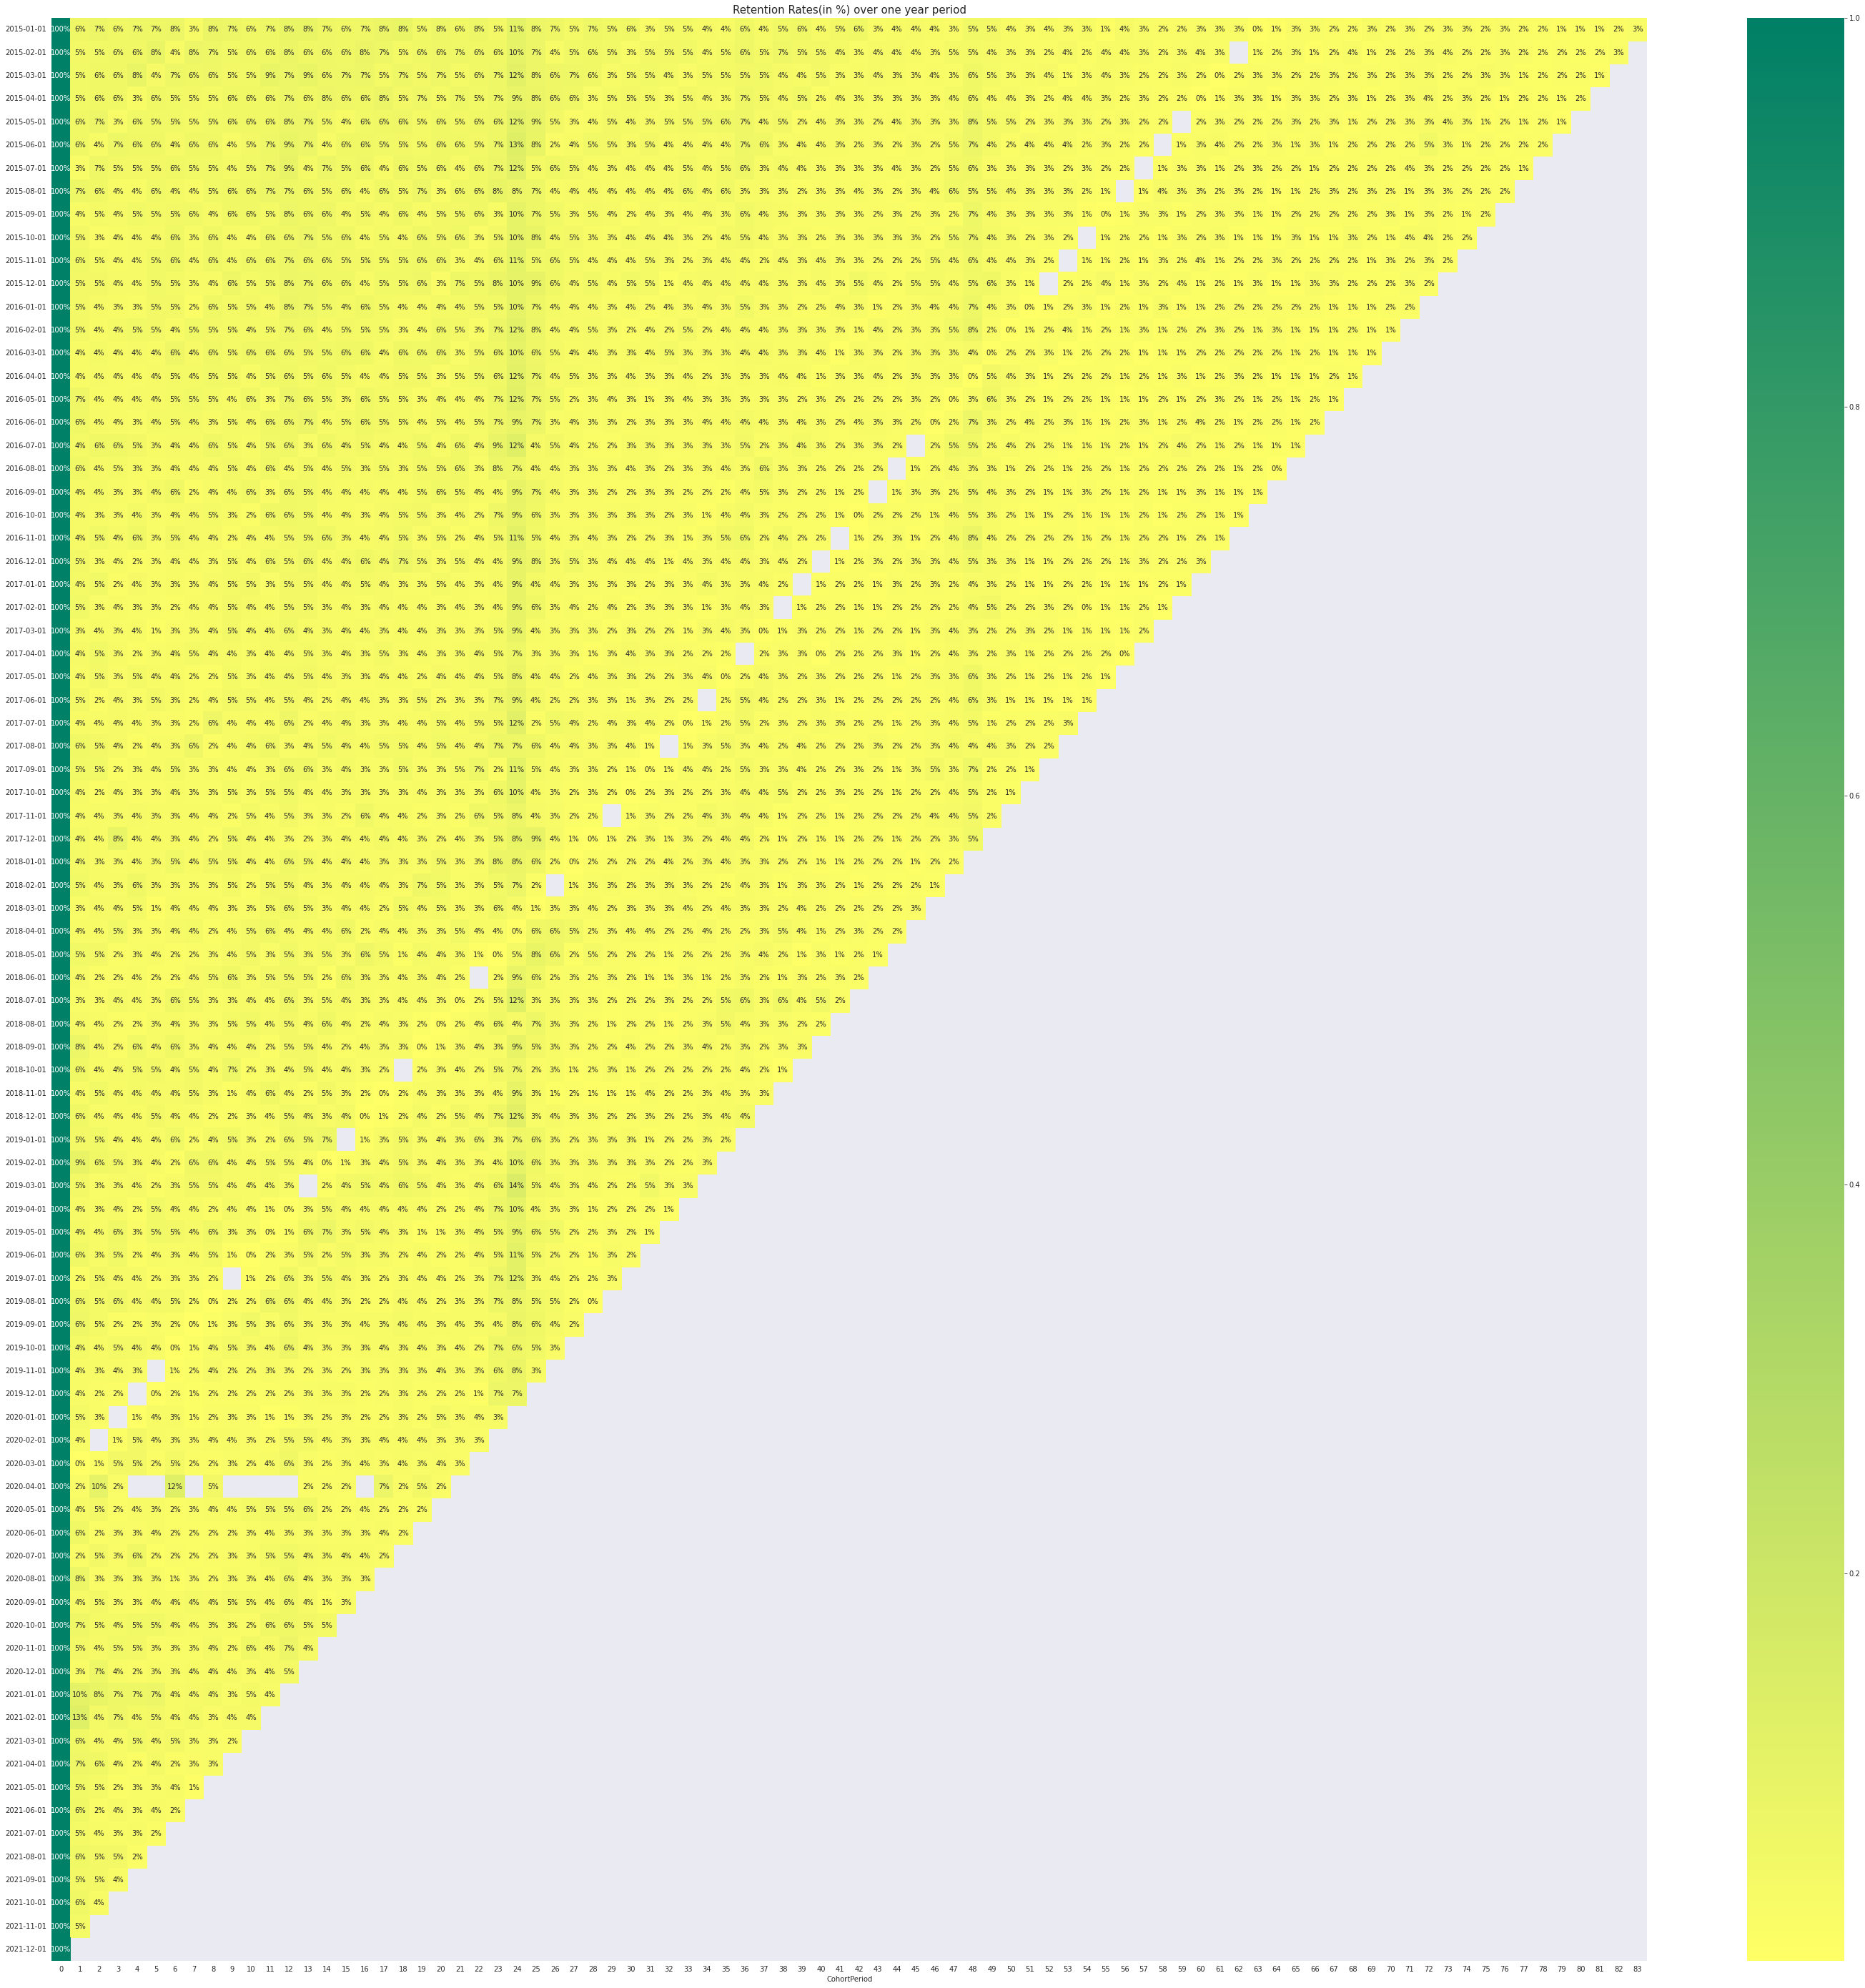

In [71]:
#Build the heatmap or pictorial representation of above table

plt.figure(figsize=(50, 50))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="summer_r")
plt.show()
# lo mismo que lo anterior pero con un heatmap. 
# tengo que hacerlo por años salen muchos meses, aparte de quitar los años anteriores al 2015

In [72]:
amount_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Fact_total', aggfunc='mean').round(2)
# aqui utilizamos cantidad la aggfunc es la media.
amount_cohort
# aqui estamos sacando la facturación media por paso de clientes en cada fecha. 

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,284.94,284.28,296.47,327.56,298.01,310.78,290.38,265.56,346.43,310.36,277.79,288.67,278.59,293.15,309.03,312.56,257.92,320.86,305.28,266.01,253.62,243.75,315.47,288.09,279.59,312.74,305.00,262.54,285.53,303.57,304.22,283.92,296.58,255.93,286.25,241.25,291.13,242.13,254.35,278.78,...,351.00,347.93,369.78,372.08,335.16,360.31,411.18,373.49,381.08,387.33,467.36,444.96,336.72,410.93,323.42,349.83,347.15,375.41,258.55,203.56,436.84,354.69,368.87,396.62,408.41,248.05,332.45,211.37,383.76,391.30,337.83,399.11,345.82,314.48,369.41,452.25,502.50,325.99,382.92,152.86
2015-02-01,278.14,305.38,265.39,272.08,286.11,269.89,307.66,303.94,347.35,277.16,288.92,284.63,303.33,273.84,310.56,292.55,289.59,263.95,218.87,282.23,207.20,253.01,271.09,267.69,284.92,269.01,254.13,257.20,273.04,307.13,294.67,324.68,265.12,282.03,223.40,289.41,282.53,220.20,261.62,312.67,...,315.99,304.63,347.87,366.87,337.16,377.93,361.83,362.71,400.33,307.74,357.02,319.04,367.21,354.05,401.95,359.18,366.34,245.98,NaN,305.47,331.35,416.64,438.82,377.51,181.31,431.71,201.94,393.32,365.03,350.74,416.70,380.59,291.84,365.96,272.31,349.90,461.44,473.94,189.14,NaN
2015-03-01,291.32,316.04,271.65,284.50,290.25,283.22,323.72,309.22,299.64,254.15,288.70,309.95,331.74,297.61,264.41,291.85,244.13,257.12,273.59,264.42,277.45,225.39,276.33,266.67,264.56,279.15,266.65,293.72,276.47,310.61,345.51,296.95,227.25,315.86,280.25,300.00,288.00,271.73,319.47,332.12,...,350.41,399.92,373.42,320.90,340.49,410.93,407.07,440.41,310.99,328.58,279.37,386.33,366.46,351.97,435.30,390.25,310.81,416.27,337.87,383.09,346.26,417.68,409.25,226.39,331.72,236.85,378.18,389.93,344.32,360.65,319.80,363.93,419.15,380.44,388.71,331.09,378.14,332.22,NaN,NaN
2015-04-01,288.66,252.20,285.51,298.93,326.62,267.81,292.41,326.94,267.93,305.96,312.94,293.56,325.71,327.82,313.80,280.57,271.07,287.69,275.71,252.01,305.65,242.60,251.80,286.95,283.80,289.36,303.53,349.83,335.86,351.84,293.67,329.56,318.00,313.71,263.98,268.63,295.06,347.22,332.58,333.77,...,307.53,322.63,383.38,300.79,336.52,338.02,359.99,359.32,437.24,324.44,434.74,392.44,319.26,351.74,399.08,260.07,187.21,438.23,310.04,366.07,317.67,414.91,288.44,353.49,265.06,405.27,362.60,340.33,377.27,417.77,347.18,376.60,381.41,363.10,325.01,397.82,420.14,NaN,NaN,NaN
2015-05-01,291.99,216.76,284.06,310.58,277.24,282.74,295.73,250.14,285.23,300.45,328.75,330.14,305.50,315.16,284.23,313.42,289.05,295.30,285.19,247.44,256.57,274.72,235.33,260.70,282.84,256.96,291.50,312.96,285.29,225.89,340.07,208.55,351.84,328.27,250.32,318.96,296.98,293.14,330.97,237.89,...,294.36,345.36,380.29,350.06,345.12,330.66,363.00,359.28,355.35,377.83,417.46,210.29,324.77,347.14,346.08,NaN,393.39,324.90,401.13,461.61,349.71,201.64,322.07,229.13,326.37,356.41,379.11,386.97,408.78,298.68,334.02,329.04,367.56,304.77,359.04,279.51,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,237.02,202.13,198.74,267.75,236.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-01,241.89,240.91,235.25,161.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# RFM ANALISIS

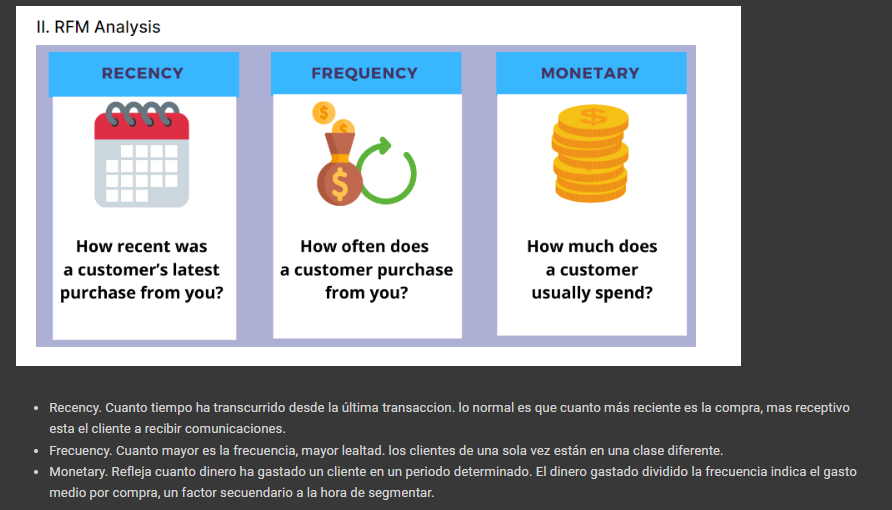

In [73]:
df_rfm = df.copy() # hacemos la copia del original. 

In [74]:
# extracting the RECENCY

recency = pd.DataFrame(df_rfm.groupby('Bastidor')['Fecha_Apertura'].max().reset_index())
# creamos la variable recency
recency['Fecha_Apertura'] = pd.to_datetime(recency['Fecha_Apertura']).dt.date # convertimos a fecha InvoiceDate
recency['MaxDate'] = recency['Fecha_Apertura'].max() # sacamos el valor maximo
recency['recency'] = (recency['MaxDate'] - recency['Fecha_Apertura']).dt.days + 1 # diferencia entre la fecha maxima de todas las facturas y la fecha maxima del bastidor en cuestión. 
recency = recency[['Bastidor','recency']] # elegimos las variables a mostrar. 
recency.head()

,Bastidor,recency
0,WAUZZZ4L97D07664,448
1,WAUZZZ8P07A02124,204
2,WAUZZZ8P1CA04845,2094
3,WAUZZZ8T4EA06800,655
4,WAUZZZ8TX8A00452,1507


In [101]:
# extracting the FREQUENCY

frequency = pd.DataFrame(df_rfm.groupby('Bastidor')['Orden_Corta2'].nunique().reset_index())
frequency.columns = ['fBastidor','frequency']
frequency.head()

,fBastidor,frequency
0,WAUZZZ4L97D07664,5
1,WAUZZZ8P07A02124,2
2,WAUZZZ8P1CA04845,1
3,WAUZZZ8T4EA06800,6
4,WAUZZZ8TX8A00452,1


In [102]:
frequency.isnull().sum()

fBastidor    0
frequency    0
dtype: int64

In [76]:
# extracting the MONETARY

monetary = pd.DataFrame(df_rfm.groupby('Bastidor')['Fact_total'].sum().reset_index())
monetary.columns = ['mBastidor','monetary']
monetary.head()

,mBastidor,monetary
0,WAUZZZ4L97D07664,1233.45
1,WAUZZZ8P07A02124,757.33
2,WAUZZZ8P1CA04845,208.16
3,WAUZZZ8T4EA06800,4483.83
4,WAUZZZ8TX8A00452,156.80


In [77]:
# combining the three into one table

rfm = pd.concat([recency,frequency,monetary], axis=1) # este es el nombre de cada dataframe
rfm.drop(['fBastidor',"mBastidor"], axis=1, inplace=True)
rfm.head(10)

,Bastidor,recency,frequency,monetary
0,WAUZZZ4L97D07664,448,5,1233.45
1,WAUZZZ8P07A02124,204,2,757.33
2,WAUZZZ8P1CA04845,2094,1,208.16
3,WAUZZZ8T4EA06800,655,6,4483.83
4,WAUZZZ8TX8A00452,1507,1,156.80
5,WAUZZZ8X1EB11477,2009,1,261.59
6,WAUZZZ8X3HB04230,836,1,388.49
7,WVWZZZ3CZ6E13699,1821,1,826.76
8,000000000FC001550,2319,1,36.66
9,0JHCL75406C200346,431,2,327.40


- Hemos extraido los tres pilares de RFM. Aunque odemos calcular más variables.
- por ejemplo podríamos crear la velocidad de la visita. es decir cada cuanto tiempo viene. 
    - ejemplo. supongamos que un cliente visita una tienda 10 veces al año, su frecuencia es de 10. compra algunos artículos por valor de 3000 en sus 10 visitas. el valor monetario es de 3000.
        - con 10 visitas tenemos diez fechas. lo que hacemos es restar la fecha de la fecha anterior para obtener después de cuantos días vuelve a visitar. obtenemos 9 fechas de 10. tomamos la media de esos 9 valores y esa es nuestra velocidad d

In [78]:
#LO QUE VAMOS A SACAR EL EL PROMEDI ENTRE VISITA Y VISITA. 
# extracting SPEED OF VISIT

Bastidor_list = list(df_rfm.Bastidor.unique()) # creamos una lista con unicos de BAstidor
c = [] # abrimos las lista c
v = [] # abrimos la lista v
for ids in Bastidor_list:  # vamos a recorrer la lista de arriba. es decir la columna de Bastidores
    sov = df_rfm[df_rfm['Bastidor']==ids].groupby('Fecha_Apertura')['Orden_Corta2'].count().reset_index()
    # generamos la variable sov que es igual a: buscamos dentro del dataframe df_rfm.Bastidor que sea igual a alguno de los valores de nuestra lista de unicos
    # lo agrupamos por Fecha_Apertura e Orden_Corta2 y contamos. 
    if sov.shape[0]>3: # si sov es mayor que 3
        sov['Fecha_Apertura1'] = sov['Fecha_Apertura'].shift(1) # generamos Fecha_Apertura1 que es el dato desplazado una posición
        sov['Difference'] = (sov['Fecha_Apertura']-sov['Fecha_Apertura1']).dt.days # generamos otra difference que es la diferencia entre Fecha_Apertura y el desplazamiento
        mean_days = round(sov.Difference.mean(),0) # aqui sacamos la media
        c.append(ids) # metemos lso datos en la lsita 
        v.append(mean_days) # meetemos los datos en la lista. 
    else: # sino es mayor que 3
        c.append(ids)
        v.append(0)
speed_of_visit = pd.DataFrame() # generamos dataframe
speed_of_visit['sBastidor'] = c # generam,os variable
speed_of_visit['sov'] = v # generamios varialbe
speed_of_visit = speed_of_visit.sort_values('sBastidor').reset_index(drop=True) # ordenamos
speed_of_visit.head()

,sBastidor,sov
0,WAUZZZ4L97D07664,452.0
1,WAUZZZ8P07A02124,0.0
2,WAUZZZ8P1CA04845,0.0
3,WAUZZZ8T4EA06800,211.0
4,WAUZZZ8TX8A00452,0.0


In [ ]:
speed_of_visit.to_csv("/content/drive/MyDrive/Colab Notebooks/speed_of_visit.csv")

In [79]:
df_rfm.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

In [80]:
# checking the overall highlights. The number of distinct customers are 4334
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54524 entries, 0 to 54523
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bastidor   54524 non-null  object 
 1   recency    54524 non-null  int64  
 2   frequency  54524 non-null  int64  
 3   monetary   54524 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ MB


In [86]:
# combining the three into one table

rfm = pd.concat([recency,frequency,monetary,speed_of_visit], axis=1) # este es el nombre de cada dataframe
rfm.drop(['fBastidor',"mBastidor", "sBastidor"], axis=1, inplace=True)
rfm.head(100)

,Bastidor,recency,frequency,monetary,sov
0,WAUZZZ4L97D07664,448,5,1233.45,452.0
1,WAUZZZ8P07A02124,204,2,757.33,0.0
2,WAUZZZ8P1CA04845,2094,1,208.16,0.0
3,WAUZZZ8T4EA06800,655,6,4483.83,211.0
4,WAUZZZ8TX8A00452,1507,1,156.80,0.0
...,...,...,...,...,...
95,KL1SF48D9BB227426,1761,2,1378.53,0.0
96,KL1SF48D9BB242494,2282,1,72.00,0.0
97,KL1SF48DJAB101722,219,1,33.01,0.0
98,KMHC851CGHU020348,695,1,121.30,0.0


In [107]:
# checking the summary
rfm.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,recency,frequency,monetary,sov,recency_score
count,54524.000000,54524.000000,54524.000000,54524.000000,54524.000000
mean,952.858686,2.956368,1116.166270,83.054948,3.401951
std,738.033538,3.179085,2002.302955,151.368637,1.281120
min,1.000000,1.000000,0.000000,0.000000,1.000000
25%,283.000000,1.000000,224.245000,0.000000,3.000000
50%,787.000000,2.000000,623.510000,0.000000,4.000000
75%,1544.000000,4.000000,1466.102500,145.000000,5.000000
90%,2082.000000,6.000000,2754.638000,326.000000,5.000000
95%,2306.000000,8.000000,3745.516000,418.000000,5.000000
99%,2503.000000,12.000000,6106.997600,582.000000,5.000000


- ahora el objetivo es categorizar a los clientes en función de su valor. 
- los vamos a etiquetas 1-5, siendo el 1 el más bajo y el 5 el mas alto. hacemos cortes del 25, 50, 75, y 90% para distribuirlos en 5 categorias. 
- despues de eso sumamos estos valores para cada vila y etiquetamos la columna como puntuacion, que tiene valores que oscilan entre 3 y 15.
- despues de eso hacemos cortes en la puntuación al 25, 50, 75, y 90% para categorizarlos en Malos, Bronce, Plata, Oro y Platino.
- los cortes se pueden hacer de muchas maneras, habría que hablar con el cliente.


In [104]:
rfm.dtypes

Bastidor             object
recency               int64
frequency             int64
monetary            float64
sov                 float64
recency_score         int64
frequency_score    category
dtype: object

In [106]:
rfm.isnull().sum()

Bastidor             0
recency              0
frequency            0
monetary             0
sov                  0
recency_score        0
frequency_score    303
dtype: int64

In [ ]:
rfm[""]

In [111]:
# assigning the numbers to RFM values. The better the RFM value higher the number
# note that this process is reverse for R score as lower the value the better it is

rfm['recency_score'] = pd.cut(rfm['recency'], bins=[0,283,787,1544,2082,2556], labels=[5,4,3,2,1]) # 
# hacemos los cortes en función de los estadísticos de arriba. 
rfm['recency_score'] = rfm['recency_score'].astype('int')
rfm['frequency_score'] = pd.cut(rfm['frequency'], bins=[0,1,2,4,6,13], labels=[1,2,3,4,5])
# hacemos los cortes por los estadísticos de arriba. 
rfm['frequency_score'] = rfm['frequency_score'].astype('float')
rfm['monetary_score'] = pd.cut(rfm['monetary'], bins=[-1,224,623,1466,2754,6200], labels=[1,2,3,4,5])
# igual que los anteriores. 
rfm['monetary_score'] = rfm['monetary_score'].astype('float')

rfm['sov_score'] = pd.cut(rfm['sov'], bins=[-1,0,145,326,582], labels=[1,5,4,3]) # 
# hacemos los cortes en función de los estadísticos de arriba. 
rfm['sov_score'] = rfm['sov_score'].astype('float')

In [112]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54524 entries, 0 to 54523
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bastidor         54524 non-null  object 
 1   recency          54524 non-null  int64  
 2   frequency        54524 non-null  int64  
 3   monetary         54524 non-null  float64
 4   sov              54524 non-null  float64
 5   recency_score    54524 non-null  int64  
 6   frequency_score  54221 non-null  float64
 7   monetary_score   54010 non-null  float64
 8   sov_score        53980 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 3.7+ MB


In [113]:
# summing the R,F,M score to make a one single column that has value range from 3-15

def score_rfm(x) : return (x['recency_score']) + (x['frequency_score']) + (x['monetary_score']) + (x["sov_score"])
# esta función suma los tres valores. 
rfm['score'] = rfm.apply(score_rfm,axis=1 ) # añadimos la variable score al dataframe. 
rfm.head()

,Bastidor,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score
0,WAUZZZ4L97D07664,448,5,1233.45,452.0,4,4.0,3.0,3.0,14.0
1,WAUZZZ8P07A02124,204,2,757.33,0.0,5,2.0,3.0,1.0,11.0
2,WAUZZZ8P1CA04845,2094,1,208.16,0.0,1,1.0,1.0,1.0,4.0
3,WAUZZZ8T4EA06800,655,6,4483.83,211.0,4,4.0,5.0,4.0,17.0
4,WAUZZZ8TX8A00452,1507,1,156.80,0.0,3,1.0,1.0,1.0,6.0


In [114]:
rfm.score.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    53341.000000
mean         9.935491
std          4.099226
min          4.000000
25%          7.000000
50%          9.000000
75%         13.000000
90%         17.000000
95%         18.000000
99%         19.000000
max         20.000000
Name: score, dtype: float64

In [116]:
# assigning the customers into one of the category Bad, Bronze, Silver, Gold and Platinum based upon the score they get
# we make cuts using percentiles. It can be done in many other ways
# se puede hacer de muchas maneras pero vamos a hacer los cortes por los estadísticos. 

rfm['customer_type'] = pd.cut(rfm['score'], bins=[0,7,9,13,17,21], labels=['Bad','Bronze','Silver','Gold','Platinum'])
rfm.head(10)

,Bastidor,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score,customer_type
0,WAUZZZ4L97D07664,448,5,1233.45,452.0,4,4.0,3.0,3.0,14.0,Gold
1,WAUZZZ8P07A02124,204,2,757.33,0.0,5,2.0,3.0,1.0,11.0,Silver
2,WAUZZZ8P1CA04845,2094,1,208.16,0.0,1,1.0,1.0,1.0,4.0,Bad
3,WAUZZZ8T4EA06800,655,6,4483.83,211.0,4,4.0,5.0,4.0,17.0,Gold
4,WAUZZZ8TX8A00452,1507,1,156.80,0.0,3,1.0,1.0,1.0,6.0,Bad
5,WAUZZZ8X1EB11477,2009,1,261.59,0.0,2,1.0,2.0,1.0,6.0,Bad
6,WAUZZZ8X3HB04230,836,1,388.49,0.0,3,1.0,2.0,1.0,7.0,Bad
7,WVWZZZ3CZ6E13699,1821,1,826.76,0.0,2,1.0,3.0,1.0,7.0,Bad
8,000000000FC001550,2319,1,36.66,0.0,1,1.0,1.0,1.0,4.0,Bad
9,0JHCL75406C200346,431,2,327.40,0.0,4,2.0,2.0,1.0,9.0,Bronze
